# Model Knn : Amélioration d'un model de données
# sur les données Ddos

## 1 Chargement des librairies

In [1]:


# Librairies
import pandas as pd
import numpy as np
import re

# Graphiques
import seaborn as sns ; sns.set()
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import learning_curve


# Machine learning - Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

# Machine learning - Modèle d'apprentissage supervisé
from sklearn.neighbors import KNeighborsClassifier

# Machine learning - Modèle selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle
from typing import Tuple

# Machine learning - Métriques d'erreur
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot.metrics as splt
from sklearn.metrics import ConfusionMatrixDisplay
import itertools



## 2 Chargement des fichiers

In [2]:
test = 'https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTest%2B.txt'
train ='https://raw.githubusercontent.com/Marceline37/securit-/main/KDDTrain%2B.txt'

In [3]:
df = pd.read_csv(train)

In [4]:
df1 = pd.read_csv(test)

In [5]:
# Mise en place des noms de colonnnes sur les deux dataframes
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])
df.columns = columns
df1.columns = columns

In [6]:
# Concaténation de df et df1
df = pd.concat([df, df1], ignore_index=True)

In [7]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148510,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148511,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal,21
148512,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back,15
148513,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## 3 Nettoyage des données

In [8]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [9]:
df['attack'].value_counts()

normal             77053
neptune            45870
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm               2


In [10]:
ddos = ['Neptune', 'smurf', 'back', 'teardrop', 'apache2', 'processtable', 'mailbomb', 'pod', 'land', 'worm', 'udpstorm']
norm = ['normal']

In [11]:
def attack_type(row):
    if row['attack'] in ddos:
        return 'ddoS'
    elif row['attack'] in norm:
        return 'normal'
    else:  
        return 'other'

In [12]:
# Application de la fonction sur la colonne attack
df['Label'] = df.apply(attack_type, axis=1)

In [13]:
# Suppression des lignes avec attack_type == 'other'
df = df.drop(df[df['Label'] == 'other'].index)

In [14]:
df['Label'].value_counts()

normal    77053
ddoS       7516
Name: Label, dtype: int64

In [15]:
count_attack = df['attack'].value_counts()
count_attack

normal          77053
smurf            3311
back             1315
teardrop          904
apache2           737
processtable      685
mailbomb          293
pod               242
land               25
worm                2
udpstorm            2
Name: attack, dtype: int64

In [46]:
df_copy =df.copy()

In [47]:
#il y a dans la df 4000l (Syn/BENIGN)
df_copy.to_csv('C:/Users/marce/OneDrive/Bureau/streamlit0.ddos.csv', index=False)

In [16]:
# Renommer les valeurs dans la colonne Label
df = df.fillna(-1).replace({'normal':0, 'ddoS':1})

In [17]:
df['Label'].value_counts()

0    77053
1     7516
Name: Label, dtype: int64

In [18]:
# Suppression des lignes contenant des valeurs manquantes
df = df.dropna()

In [19]:
# Modifier le type de la colonne 'level' en string
df=  df.astype({'level':'str'})

In [20]:
numerical_cols = ['src_bytes','dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot','num_failed_logins', 'logged_in',
                  'num_compromised', 'root_shell','su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                  'num_access_files','is_host_login','is_guest_login', 'count', 'srv_count', 'serror_rate',
                  'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate','diff_srv_rate', 'srv_diff_host_rate',
                  'dst_host_count','dst_host_srv_count', 'dst_host_same_srv_rate','dst_host_diff_srv_rate', 
                  'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                  'dst_host_srv_serror_rate', 'dst_host_rerror_rate','dst_host_srv_rerror_rate']

In [56]:
# Transformation de la liste en dataframe Pandas
df_numerical_cols = pd.DataFrame({'numerical_cols': numerical_cols})

In [22]:
df['Label'].value_counts()


0    77053
1     7516
Name: Label, dtype: int64

In [23]:
data =df

In [26]:
def test_data(data): 
    # Sélectionner les lignes correspondant à la valeur "Syn" dans la colonne Label
    ddos_index = data[data['Label'] == 1].index
    # Tirer un échantillon de 2000 lignes de la classe "Syn"
    ddos_sample = data.loc[ddos_index].sample(n=1500, random_state=42)
    # Supprimer les lignes échantillonnées de la DataFrame d'origine
    data = data.drop(ddos_index)

    # Sélectionner les lignes correspondant à la valeur "Benign" dans la colonne Label
    norm_index = data[data['Label'] == 0].index
    # Tirer un échantillon de 2000 lignes de la classe "Benign"
    norm_sample = data.loc[norm_index].sample(n=1500, random_state=42)
    # Supprimer les lignes échantillonnées de la DataFrame d'origine
    data = data.drop(norm_index)

    # Concaténer les deux échantillons en un seul DataFrame
    sampled = pd.concat([ddos_sample, norm_sample])

    # Retourner la DataFrame échantillonnée et la DataFrame d'origine avec les lignes échantillonnées supprimées
    return sampled, data

In [27]:
df_sampled, df_remaining = test_data(data)

In [29]:
df1 = df_sampled

## 5 Preprocessing

In [30]:
# Définir les colonnes de X,y
X = df1.drop(columns="Label")
y = df1['Label']

In [31]:
X.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

In [32]:
y

142567    1
132708    1
125434    1
28798     1
126827    1
         ..
47346     0
64486     0
134548    0
68675     0
120170    0
Name: Label, Length: 3000, dtype: int64

## 6 Définir le pipeline

In [62]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  

### 6.1 Encodage des données dans le pipeline

In [63]:
# Definir les données numérics et catégorielles
quantitative = [ 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate']
qualitative = ['protocol_type', 'service', 'flag','level']# 

In [64]:
transfo_quanti = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='median')),
    ('standard', StandardScaler())])
transfo_quali = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='constant', fill_value='manquant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [116]:
preprocessor = ColumnTransformer(transformers=[
        ('quanti', transfo_quanti , quantitative),
        ('quali', transfo_quali , qualitative)])


In [117]:
# Ajouter l'étape de sélection de caractéristiques
k_best = SelectKBest(mutual_info_classif, k=10)

### 6.2 Activation du pipeline

In [125]:
knn_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', k_best),
        ('knn', KNeighborsClassifier())
    ])

In [126]:
# Sélectionner les meilleures caractéristiques à partir de l'ensemble de formation
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('quanti',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard',
                                                                   StandardScaler())]),
                                                  ['src_bytes', 'dst_bytes',
                                                   'land', 'wrong_fragment',
                                                   'urgent', 'hot',
                                                   'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'num_root',
                                                   'num_file_creations',
                                                   'num_s...
                                                   'dst_host_diff_srv_rate', ...]),
                                                 ('quali',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(fill_value='manquant',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['protocol_type', 'service',
                                                   'flag', 'level'])])),
                ('feature_selection',
                 SelectKBest(score_func=<function mutual_info_classif at 0x0000024692494700>)),
                ('knn', KNeighborsClassifier())])

### 6.3 Paramétrage du grid_search

In [127]:
#Paramètres pour la recherche de grille
param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11],
            'knn__weights': ['uniform', 'distance'],
             'feature_selection__k':[10,20,30]}

In [128]:
# Initialiser le modèle de recherche d'hyperparamètres
grid_search = GridSearchCV(knn_pipeline, param_grid=param_grid, cv=5, n_jobs=-1)

In [129]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('quanti',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard',
                                                                                          StandardScaler())]),
                                                                         ['src_bytes',
                                                                          'dst_bytes',
                                                                          'land',
                                                                          'wrong_fragment',
                                                                          'urgent',
                                                                          'hot',
                                                                          'num_failed_logins',
                                                                          'logged_in',
                                                                          'num_compromised',
                                                                          'root_shell',
                                                                          'su_attempted',
                                                                          'num_root'...
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['protocol_type',
                                                                          'service',
                                                                          'flag',
                                                                          'level'])])),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x0000024692494700>)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 20, 30],
                         'knn__n_neighbors': [3, 5, 7, 9, 11],
                         'knn__weights': ['uniform', 'distance']})

In [130]:
#Résultat du grid_search "Meilleurs paramètres pour le Knn"
print("Best parameters:", grid_search.best_params_)


Best parameters: {'feature_selection__k': 20, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}


In [131]:
print("Best score:", grid_search.best_score_)

Best score: 0.9866666666666667


In [142]:
# Paramètres que j'utilise après avoir fait la recherche du meilleur paramètre
param = {'knn__n_neighbors': [3],
            'knn__weights': ['uniform'],
        'feature_selection__k': [20]}

In [143]:
gsc = GridSearchCV(knn_pipeline,
                      param_grid=param,
                      scoring='accuracy',
                      cv=5)

In [144]:
gsc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('quanti',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standard',
                                                                                          StandardScaler())]),
                                                                         ['src_bytes',
                                                                          'dst_bytes',
                                                                          'land',
                                                                          'wrong_fragment',
                                                                          'urgent',
                                                                          'hot',
                                                                          'num_failed_logins',
                                                                          'logged_in',
                                                                          'num_compromised',
                                                                          'root_shell',
                                                                          'su_attempted',
                                                                          'num_root'...
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['protocol_type',
                                                                          'service',
                                                                          'flag',
                                                                          'level'])])),
                                       ('feature_selection',
                                        SelectKBest(score_func=<function mutual_info_classif at 0x0000024692494700>)),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'feature_selection__k': [20], 'knn__n_neighbors': [3],
                         'knn__weights': ['uniform']},
             scoring='accuracy')

In [145]:
knn_pred = gsc.predict(X_test)

In [146]:
knn_pred

array([0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,

## 8 Résultat du model

### 8.1 Résultat de l'acurracy

In [147]:
accuracy = accuracy_score(y_test, knn_pred)

In [148]:
print("L'accuracy est de:",accuracy*100)

L'accuracy est de: 98.83333333333333


## 10 Graphiques 

### 10.1 Learning_ curve

In [111]:

def plot_learning_curve(X, y, n_neighbors_range, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        KNeighborsClassifier(),
        X, y,
        cv=5,
        train_sizes=train_sizes,
        scoring='accuracy',
        n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title('Learning Curve for KNN with different number of neighbors')
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')

    for i, n_neighbors in enumerate(n_neighbors_range):
        plt.plot(train_sizes, test_scores_mean, label=f'n_neighbors={n_neighbors}')

    plt.legend()
    plt.show()

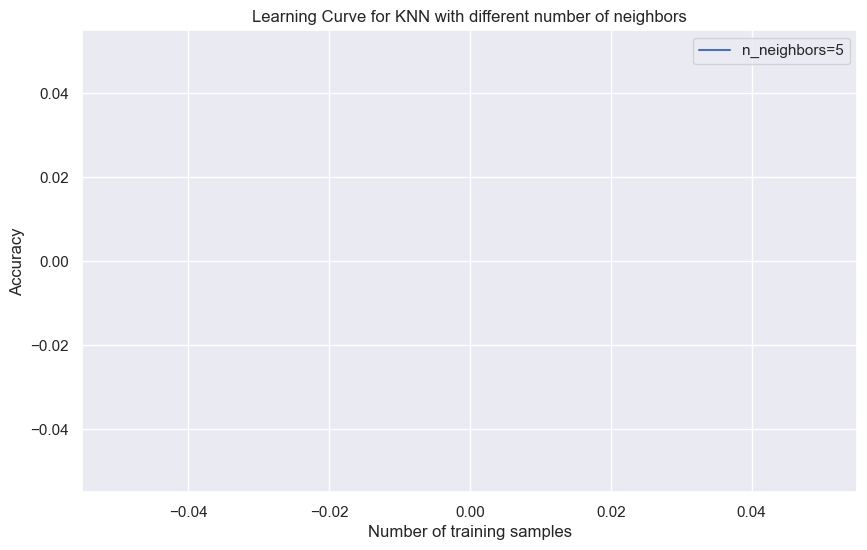

In [112]:
n_neighbors_range = [5]
plot_learning_curve(X_train, y_train, n_neighbors_range)

In [154]:
train_sizes, train_scores, test_scores = learning_curve(
KNeighborsClassifier(),
        X= X_train, y= y_train,
        cv=5,
        #train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='accuracy',
        n_jobs=-1
    )


In [155]:
print(train_sizes)

[ 192  624 1056 1488 1920]


In [157]:
print(test_scores)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


### 10.2 La confusion de matrice

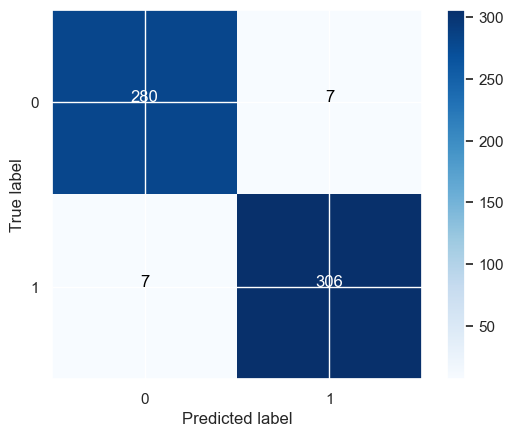

In [113]:
# générer la confusion de matrice
cm = confusion_matrix(y_test, knn_pred)

# TRacer la matrice de confusion sous forme
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()

# Ajouter des étiquettes au tracé
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Ajouter des valeurs dans le graphique
thresh = cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.show()

## 9 Enregistrement du model avec pickle

In [390]:
# Enregistrer le model en fichier .sav
filename = 'D:/marceau/DS innov alternance/Données projet DDOS/01-12/Data/knn_entrainement.sav'
pickle.dump(knn, open(filename, 'wb'))

## 11 Faire une prédiction de mon model  Knn pour les attaques Ddos


In [5]:
# Chargez le fichier CSV complet
csv_file_path = "D:/marceau/DS innov alternance/Données projet DDOS/01-12/Data/r"
data_to_predict = pd.read_csv(csv_file_path, low_memory=False)

In [6]:
# load the model from disk
#loaded_model = pickle.load(open('D:/marceau/DS innov alternance/Données projet DDOS/01-12/Data/knn_entrainement.sav', 'rb'))
with open('D:/marceau/DS innov alternance/Données projet DDOS/01-12/Data/knn_entrainement.sav', 'rb') as f:
    model = pickle.load(f)

In [7]:
# Faire des prédictions sur les données chargées
predictions = model.predict(data_to_predict)

In [8]:
# Afficher les prédictions
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

*Je peux constater au vue des résultat que y a pour:* 
- **la valeur:2(Dns)**
     - il y a 5 erreurs qui m'indique que ce ne sont pas des Dns mais Bening(0)
- **La valeur:0(Benign)**
    - il y a 5 erreurs qui m'indique que ce sont pas des Bening mais des Dns(2)
    - il y a 2 erreurs qui qui m'indique que ce sont pas des Bening mais des Syn(1)
- **La valeur:1(Syn)**
    - il y a 1 erreur qui m'indique que ce n'est pas un Syn mais Bening(0)